In [7]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
# Define los paths a las carpetas de entrenamiento y prueba
base_directory = 'C:/Users/victo/Downloads/Cars Dataset'  # Actualiza esta ruta
train_folder_path = os.path.join(base_directory, 'train')
test_folder_path = os.path.join(base_directory, 'test')


In [9]:

# Define la función para cargar imágenes y etiquetas
def load_images_and_labels(base_path, categories, target_size=(128, 128)):
    images = []
    labels = []
    label_dict = {category: idx for idx, category in enumerate(categories)}

    for category in categories:
        category_path = os.path.join(base_path, category)
        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)
            image = load_img(image_path, target_size=target_size)
            image = img_to_array(image)
            images.append(image)
            labels.append(label_dict[category])
    
    return np.array(images), np.array(labels)

# Lista de nombres de categorías
train_files = os.listdir(train_folder_path)
test_files = os.listdir(test_folder_path)

# Cargar imágenes y etiquetas
train_images, train_labels = load_images_and_labels(train_folder_path, train_files)
test_images, test_labels = load_images_and_labels(test_folder_path, test_files)

# Normalizar las imágenes
train_images /= 255.0
test_images /= 255.0

# Convertir etiquetas a one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (3352, 128, 128, 3)
Train labels shape: (3352, 7)
Test images shape: (813, 128, 128, 3)
Test labels shape: (813, 7)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense 

# Construcción del modelo
model1 = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Transforma la matriz de entrada en un vector
    Dense(128, activation='relu'),       # Primera capa oculta con 128 neuronas
    Dense(64, activation='relu'),        # Segunda capa oculta con 64 neuronas
    Dense(7, activation='softmax')       # Capa de salida con 7 neuronas, una por cada categoría
])

# Compilación del modelo
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history1 = model1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluar el modelo
print("Evaluación en el conjunto de prueba:")
model1.evaluate(test_images, test_labels)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.1940 - loss: 10.5031 - val_accuracy: 0.3014 - val_loss: 2.2896
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3350 - loss: 2.0855 - val_accuracy: 0.2116 - val_loss: 3.2388
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3538 - loss: 2.3765 - val_accuracy: 0.2940 - val_loss: 2.0918
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.4011 - loss: 1.8254 - val_accuracy: 0.2645 - val_loss: 2.6750
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.4689 - loss: 1.5704 - val_accuracy: 0.4219 - val_loss: 1.9290
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5288 - loss: 1.3365 - val_accuracy: 0.4342 - val_loss: 1.7129
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5520 - loss: 1.3184 - val_accuracy: 0.4256 - val_loss: 1.6927
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5347 - loss: 1.3291 - val_acc

[1.8865065574645996, 0.4243542551994324]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense 

# Construcción del modelo
model1 = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Transforma la matriz de entrada en un vector
    Dense(128, activation='relu'),       # Primera capa oculta con 128 neuronas
    Dense(64, activation='relu'),        # Segunda capa oculta con 64 neuronas
    Dense(7, activation='softmax')       # Capa de salida con 7 neuronas, una por cada categoría
])

# Compilación del modelo
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history2 = model1.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Evaluar el modelo
print("Evaluación en el conjunto de prueba:")
model1.evaluate(test_images, test_labels)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.2167 - loss: 7.1324 - val_accuracy: 0.2669 - val_loss: 2.4033
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.3081 - loss: 2.2918 - val_accuracy: 0.2558 - val_loss: 2.1670
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3855 - loss: 1.7635 - val_accuracy: 0.3284 - val_loss: 2.3034
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.4026 - loss: 1.7222 - val_accuracy: 0.3333 - val_loss: 1.9325
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.4405 - loss: 1.5769 - val_accuracy: 0.4490 - val_loss: 1.6337
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.5048 - loss: 1.3537 - val_accuracy: 0.4034 - val_loss: 1.7765
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5478 - loss: 1.2904 - val_accuracy: 0.3924 - val_loss: 1.7540
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5874 - loss: 1.1767 - val_accu

[1.8213742971420288, 0.48954489827156067]

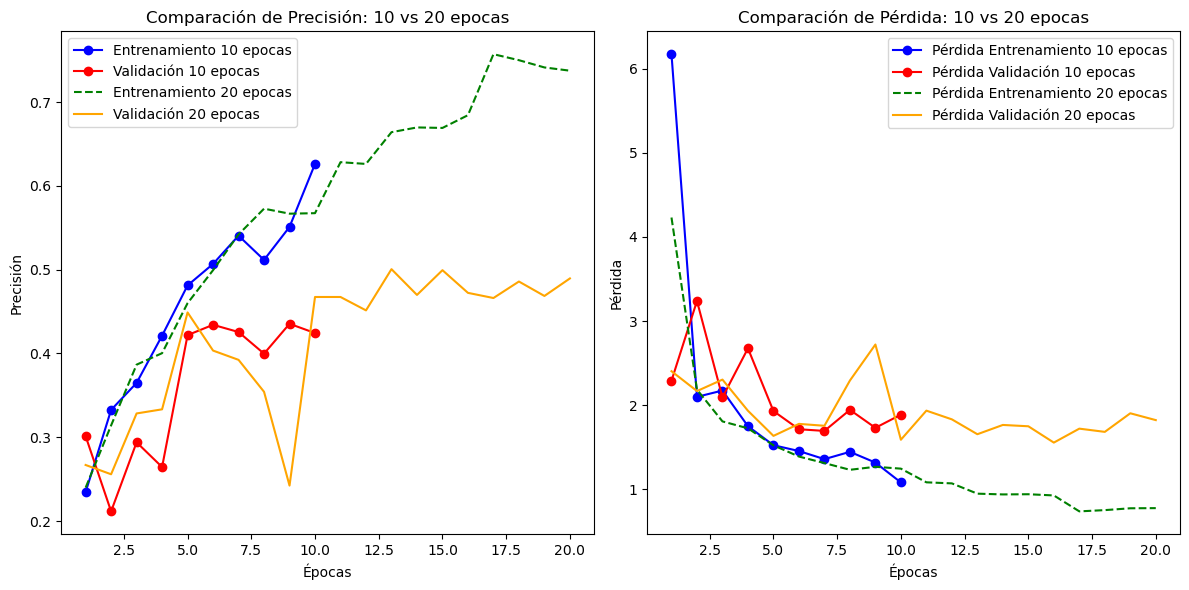

In [19]:
import matplotlib.pyplot as plt

# Suponiendo que las historias de entrenamiento tienen diferentes longitudes
epochs1 = range(1, len(history1.history['accuracy']) + 1)
epochs2 = range(1, len(history2.history['accuracy']) + 1)

# Datos de precisión y pérdida
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

# Crear gráficos para Precisión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs1, acc1, 'b-o', label='Entrenamiento 10 epocas')
plt.plot(epochs1, val_acc1, 'r-o', label='Validación 10 epocas')
plt.plot(epochs2, acc2, 'g--', label='Entrenamiento 20 epocas')
plt.plot(epochs2, val_acc2, 'orange', label='Validación 20 epocas')
plt.title('Comparación de Precisión: 10 vs 20 epocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Crear gráficos para Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs1, loss1, 'b-o', label='Pérdida Entrenamiento 10 epocas')
plt.plot(epochs1, val_loss1, 'r-o', label='Pérdida Validación 10 epocas')
plt.plot(epochs2, loss2, 'g--', label='Pérdida Entrenamiento 20 epocas')
plt.plot(epochs2, val_loss2, 'orange', label='Pérdida Validación 20 epocas')
plt.title('Comparación de Pérdida: 10 vs 20 epocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
# Construcción del modelo con Dropout
model2 = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Transforma la matriz de entrada en un vector
    Dense(256, activation='relu'), # Aumentado de 128 a 256
    BatchNormalization(),  # Añadiendo BatchNormalization
    Dense(128, activation='relu'),  # Nueva capa intermedia
    Dense(64, activation='relu'),
    BatchNormalization(),  # Añadiendo otra BatchNormalization
    Dense(7, activation='softmax')  # Capa de salida con 7 neuronas, una por cada categoría
])

# Compilación del modelo
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history3 = model2.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))
# Evaluar el modelo
print("Evaluación en el conjunto de prueba:")
model2.evaluate(test_images, test_labels)

Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.2540 - loss: 2.0538 - val_accuracy: 0.2780 - val_loss: 2.2274
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - accuracy: 0.4562 - loss: 1.5313 - val_accuracy: 0.3641 - val_loss: 1.8573
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - accuracy: 0.5267 - loss: 1.3412 - val_accuracy: 0.3469 - val_loss: 1.7419
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - accuracy: 0.6009 - loss: 1.1611 - val_accuracy: 0.3026 - val_loss: 2.0413
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.6589 - loss: 0.9945 - val_accuracy: 0.2694 - val_loss: 2.8794
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.6927 - loss: 0.8789 - val_accuracy: 0.2731 - val_loss: 2.8006
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.7224 - loss: 0.8071 - val_accuracy: 0.2337 - val_loss: 3.6368
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - accuracy: 0.7659 - loss: 0

[6.689658164978027, 0.3087330758571625]

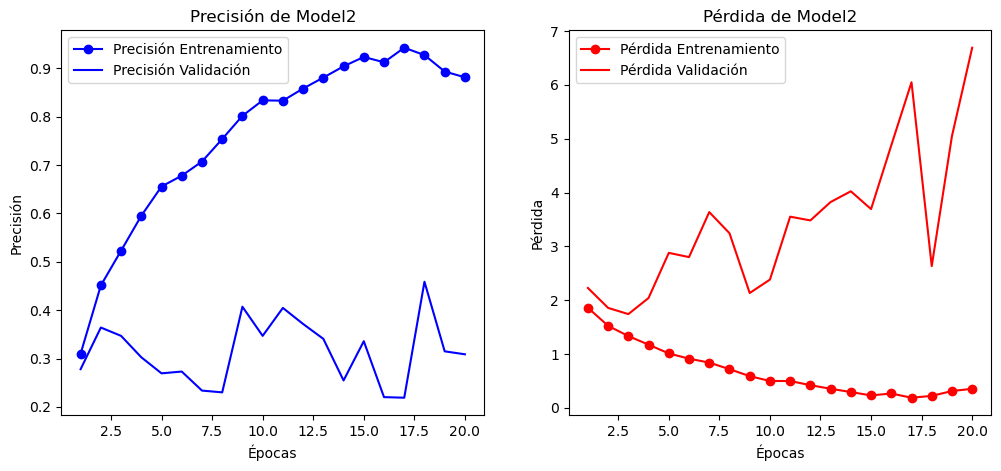

In [41]:
import matplotlib.pyplot as plt

# Datos de precisión y pérdida de model2
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

# Crear gráficos para Precisión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Precisión Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión Validación')
plt.title('Precisión de Model2')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Crear gráficos para Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro-', label='Pérdida Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida Validación')
plt.title('Pérdida de Model2')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

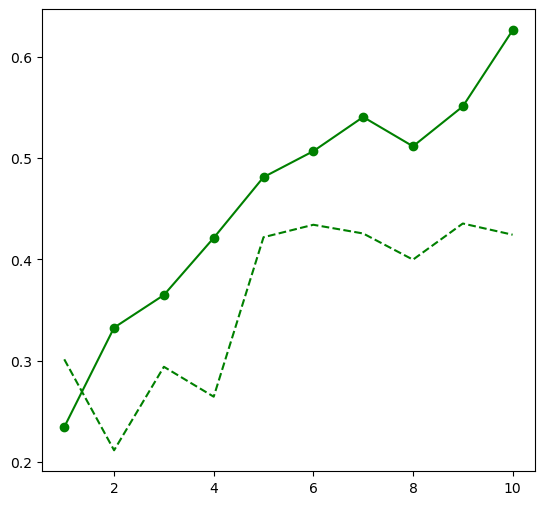

In [59]:
# Supongamos que 'history1', 'history2' y 'history3' son los historiales de entrenamiento de model1, model2 y model3
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

# Número de épocas (asumiendo que todas tienen el mismo número de épocas)
epochs = range(1, len(acc1) + 1)

# Comparación de Precisión
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc1, 'go-', label='Precisión Entrenamiento Model1')
plt.plot(epochs, val_acc1, 'g--', label='Precisión Validación Model1')
plt.plot(epochs, acc2, 'bo-', label='Precisión Entrenamiento Model2')
plt.plot(epochs, val_acc2, 'b--', label='Precisión Validación Model2')
plt.plot(epochs, acc3, 'ro-', label='Precisión Entrenamiento Model3')
plt.plot(epochs, val_acc3, 'r--', label='Precisión Validación Model3')
plt.title('Comparación de Precisión: Model1 vs Model2 vs Model3')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Comparación de Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss1, 'go-', label='Pérdida Entrenamiento Model1')
plt.plot(epochs, val_loss1, 'g--', label='Pérdida Validación Model1')
plt.plot(epochs, loss2, 'bo-', label='Pérdida Entrenamiento Model2')
plt.plot(epochs, val_loss2, 'b--', label='Pérdida Validación Model2')
plt.plot(epochs, loss3, 'ro-', label='Pérdida Entrenamiento Model3')
plt.plot(epochs, val_loss3, 'r--', label='Pérdida Validación Model3')
plt.title('Comparación de Pérdida: Model1 vs Model2 vs Model3')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Construcción del modelo con Dropout y BatchNormalization
model3 = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Transforma la matriz de entrada en un vector
    Dense(256, activation='relu'),  # Aumentado de 128 a 256
    BatchNormalization(),  # Añadiendo BatchNormalization
    Dropout(0.3),  # Añadiendo Dropout del 30% en la primera capa oculta
    Dense(128, activation='relu'),  # Nueva capa intermedia
    BatchNormalization(),  # Añadiendo otra BatchNormalization
    Dropout(0.3),  # Añadiendo Dropout del 30% en la segunda capa oculta
    Dense(64, activation='relu'),
    Dropout(0.3),  # Añadiendo Dropout del 30% en la tercera capa oculta
    Dense(7, activation='softmax')  # Capa de salida con 7 neuronas, una por cada categoría
])

# Compilación del modelo
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Entrenamiento del modelo
history4 = model3.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Evaluar el modelo
print("Evaluación en el conjunto de prueba:")
model3.evaluate(test_images, test_labels)


C:\Users\victo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.2352 - loss: 2.3014 - val_accuracy: 0.2632 - val_loss: 1.9791
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.2895 - loss: 1.9388 - val_accuracy: 0.3530 - val_loss: 1.7242
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.3388 - loss: 1.7893 - val_accuracy: 0.3739 - val_loss: 1.7445
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.3770 - loss: 1.6662 - val_accuracy: 0.3296 - val_loss: 1.7589
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.3982 - loss: 1.6250 - val_accuracy: 0.4219 - val_loss: 1.5936
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.4306 - loss: 1.5476 - val_accuracy: 0.3555 - val_loss: 1.7393
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.4595 - loss: 1.4830 - val_accuracy: 0.4157 - val_loss: 1.5814
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.4872 - loss: 1.4392 - val_acc

[2.0901403427124023, 0.300123006105423]

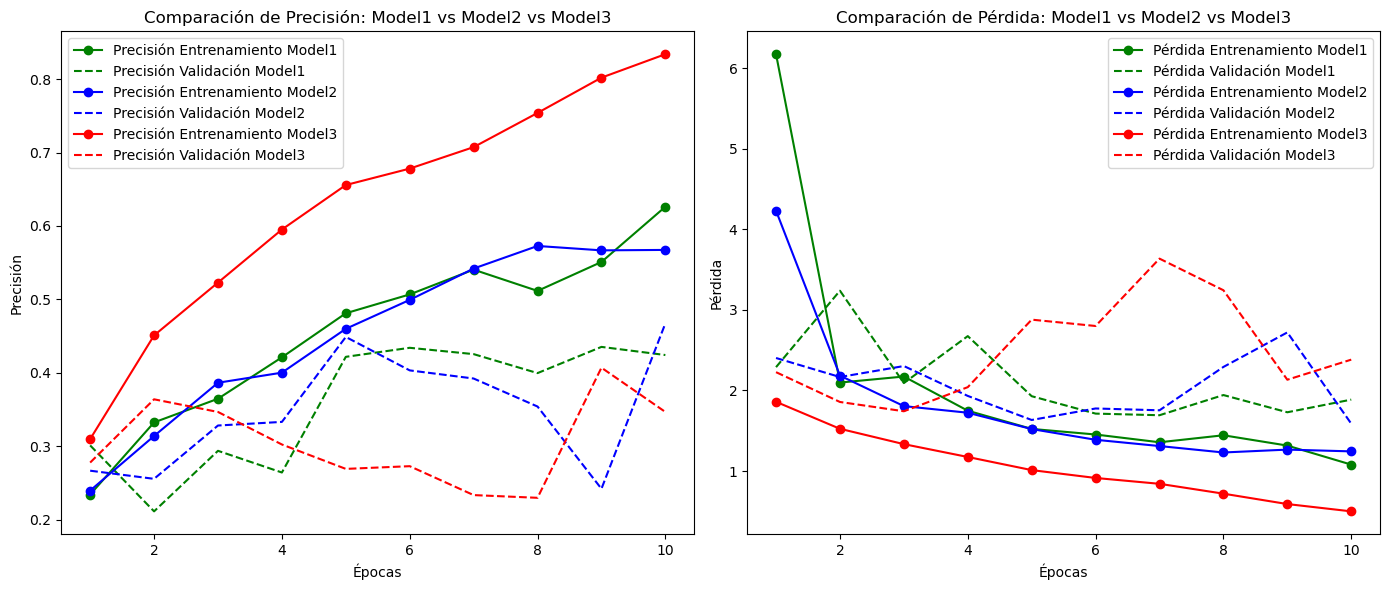

In [63]:
# Supongamos que 'history1', 'history2' y 'history3' son los historiales de entrenamiento de model1, model2 y model3
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

# Asegurar que todas las listas de datos tienen la misma longitud
num_epochs = min(len(acc1), len(acc2), len(acc3))
epochs = range(1, num_epochs + 1)

# Ajustar los datos a la misma longitud
acc1, val_acc1, loss1, val_loss1 = acc1[:num_epochs], val_acc1[:num_epochs], loss1[:num_epochs], val_loss1[:num_epochs]
acc2, val_acc2, loss2, val_loss2 = acc2[:num_epochs], val_acc2[:num_epochs], loss2[:num_epochs], val_loss2[:num_epochs]
acc3, val_acc3, loss3, val_loss3 = acc3[:num_epochs], val_acc3[:num_epochs], loss3[:num_epochs], val_loss3[:num_epochs]

# Comparación de Precisión
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc1, 'go-', label='Precisión Entrenamiento Model1')
plt.plot(epochs, val_acc1, 'g--', label='Precisión Validación Model1')
plt.plot(epochs, acc2, 'bo-', label='Precisión Entrenamiento Model2')
plt.plot(epochs, val_acc2, 'b--', label='Precisión Validación Model2')
plt.plot(epochs, acc3, 'ro-', label='Precisión Entrenamiento Model3')
plt.plot(epochs, val_acc3, 'r--', label='Precisión Validación Model3')
plt.title('Comparación de Precisión: Model1 vs Model2 vs Model3')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Comparación de Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss1, 'go-', label='Pérdida Entrenamiento Model1')
plt.plot(epochs, val_loss1, 'g--', label='Pérdida Validación Model1')
plt.plot(epochs, loss2, 'bo-', label='Pérdida Entrenamiento Model2')
plt.plot(epochs, val_loss2, 'b--', label='Pérdida Validación Model2')
plt.plot(epochs, loss3, 'ro-', label='Pérdida Entrenamiento Model3')
plt.plot(epochs, val_loss3, 'r--', label='Pérdida Validación Model3')
plt.title('Comparación de Pérdida: Model1 vs Model2 vs Model3')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


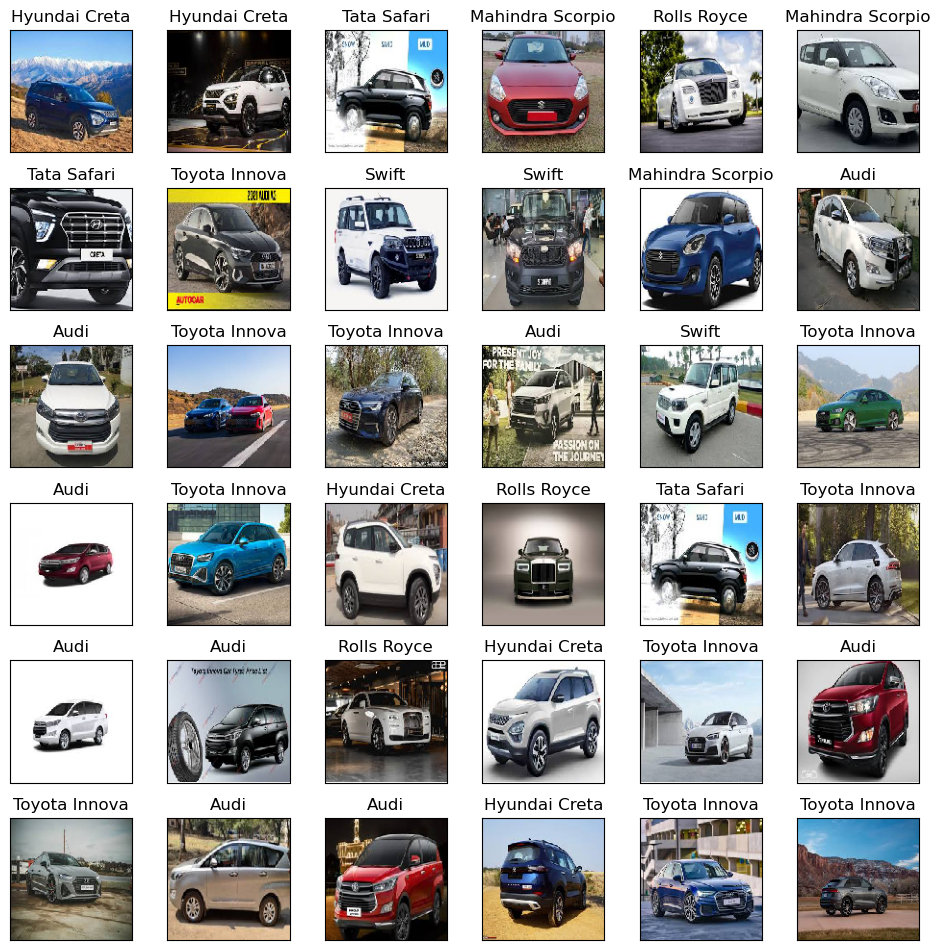

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de nombres de las clases, asegúrate de que coinciden con el modelo y los datos
nombres = ['Toyota Innova', 'Tata Safari', 'Swift', 'Rolls Royce', 'Mahindra Scorpio', 'Hyundai Creta', 'Audi']

# Definimos el tamaño de la grilla
h = 6  # alto de la grilla
w = 6  # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6 * h, 1.6 * w))

# Mostrar ejemplos al azar del conjunto de test
for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(test_images))  # Índice aleatorio en el conjunto de prueba
        axs[i, j].set_title(nombres[test_labels[ex].argmax()])  # Obtener la etiqueta (one-hot a nombre)
        axs[i, j].imshow(test_images[ex])  # Mostrar imagen
        axs[i, j].grid(False)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.tight_layout()
plt.show()


In [1]:
!pip install tensorflow

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Número de clases (cambiar si tienes un número diferente)
num_classes = 7

# Crear el modelo CNN
model_cnn = Sequential([
    Input(shape=(128, 128, 3)),  # Define explícitamente la forma de entrada
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Número de clases en la capa de salida
])

# Compilar el modelo
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Aplicar Data Augmentation
train_generator = datagen.flow(train_images, train_labels, batch_size=32)

# Entrenar el modelo
history_cnn = model_cnn.fit(
    train_generator,
    epochs=20,
    validation_data=(test_images, test_labels)
)

# Evaluar el modelo
test_loss, test_accuracy = model_cnn.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/20


C:\Users\victo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.2309 - loss: 1.9133 - val_accuracy: 0.2903 - val_loss: 1.7977
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.2926 - loss: 1.8110 - val_accuracy: 0.3506 - val_loss: 1.7107
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.3481 - loss: 1.7533 - val_accuracy: 0.4305 - val_loss: 1.6118
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.3769 - loss: 1.6822 - val_accuracy: 0.4453 - val_loss: 1.4960
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.4105 - loss: 1.6200 - val_accuracy: 0.3862 - val_loss: 1.5827
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.4422 - loss: 1.5452 - val_accuracy: 0.4772 - val_loss: 1.3905
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.4494 - loss: 1.5256 - val_accuracy: 0.5301 - val_loss: 1.2973
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.4608 - loss: 1.4841 - val

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


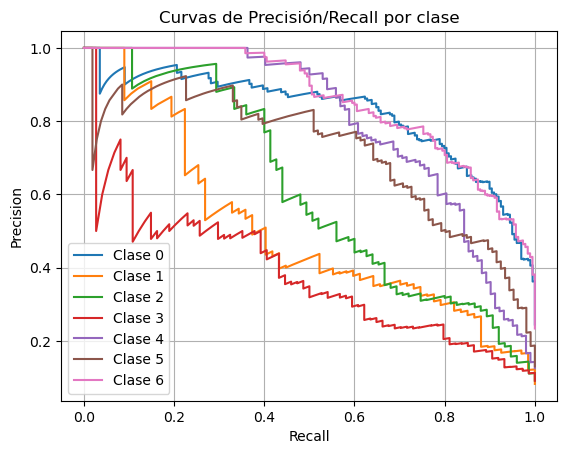

In [15]:
from sklearn.metrics import classification_report, precision_recall_curve
import numpy as np

# Obtener las predicciones del modelo
y_pred_probs = model_cnn.predict(test_images)  # Probabilidades predichas
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Clases predichas
y_true_classes = np.argmax(test_labels, axis=1)  # Clases verdaderas

# Calcular curvas de precisión y recuerdo para cada clase
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(test_labels[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f'Clase {i}')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas de Precisión/Recall por clase')
plt.legend()
plt.grid()
plt.show()


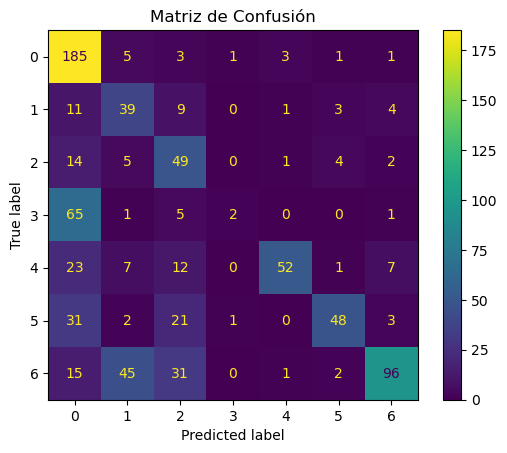

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(num_classes))
disp.plot(cmap='viridis')
plt.title('Matriz de Confusión')
plt.show()


In [19]:
# Informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=[f'Clase {i}' for i in range(num_classes)]))


Informe de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.54      0.93      0.68       199
     Clase 1       0.38      0.58      0.46        67
     Clase 2       0.38      0.65      0.48        75
     Clase 3       0.50      0.03      0.05        74
     Clase 4       0.90      0.51      0.65       102
     Clase 5       0.81      0.45      0.58       106
     Clase 6       0.84      0.51      0.63       190

    accuracy                           0.58       813
   macro avg       0.62      0.52      0.50       813
weighted avg       0.66      0.58      0.56       813



In [43]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.optimizers import Adam

# Calcular pesos de clase
y_true_classes = np.argmax(train_labels, axis=1)  # Convertir etiquetas a formato categórico
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_true_classes),
    y=y_true_classes
)
class_weights = dict(enumerate(class_weights))  # Convertir a formato compatible con Keras

print("Pesos de Clase:", class_weights)

# Crear un modelo CNN mejorado
model_cnn_v2 = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(64, (3, 3), activation='relu'),  # Aumentar el número de filtros
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo con una tasa de aprendizaje ajustada
model_cnn_v2.compile(
    optimizer=Adam(learning_rate=0.0005),  # Reducir la tasa de aprendizaje
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo utilizando los pesos de clase
history_cnn_v2 = model_cnn_v2.fit(
    train_generator,
    epochs=30,  # Incrementar el número de épocas
    validation_data=(test_images, test_labels),
    class_weight=class_weights  # Aplicar balanceo de clases
)

# Evaluar el modelo
test_loss_v2, test_accuracy_v2 = model_cnn_v2.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss_v2}, Test Accuracy: {test_accuracy_v2}")


Pesos de Clase: {0: 0.5882765882765882, 1: 1.7670005271481286, 2: 1.515370705244123, 3: 1.5397335783187873, 4: 1.1293800539083558, 5: 1.0858438613540655, 6: 0.6178801843317973}
Epoch 1/30


C:\Users\victo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 45s 396ms/step - accuracy: 0.2078 - loss: 1.9126 - val_accuracy: 0.2448 - val_loss: 2.0484
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 374ms/step - accuracy: 0.1526 - loss: 1.9371 - val_accuracy: 0.2448 - val_loss: 2.0456
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 371ms/step - accuracy: 0.1386 - loss: 1.9466 - val_accuracy: 0.2448 - val_loss: 2.0459
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 373ms/step - accuracy: 0.1358 - loss: 1.9405 - val_accuracy: 0.2448 - val_loss: 2.0456
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 372ms/step - accuracy: 0.1347 - loss: 1.9674 - val_accuracy: 0.2448 - val_loss: 2.0433
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 375ms/step - accuracy: 0.1600 - loss: 1.9394 - val_accuracy: 0.2448 - val_loss: 2.0403
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 374ms/step - accuracy: 0.1712 - loss: 1.9361 - val_accuracy: 0.2448 - val_loss: 2.0444
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 375ms/step - accuracy: 0.1344 - loss: 1.9414 - val

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step


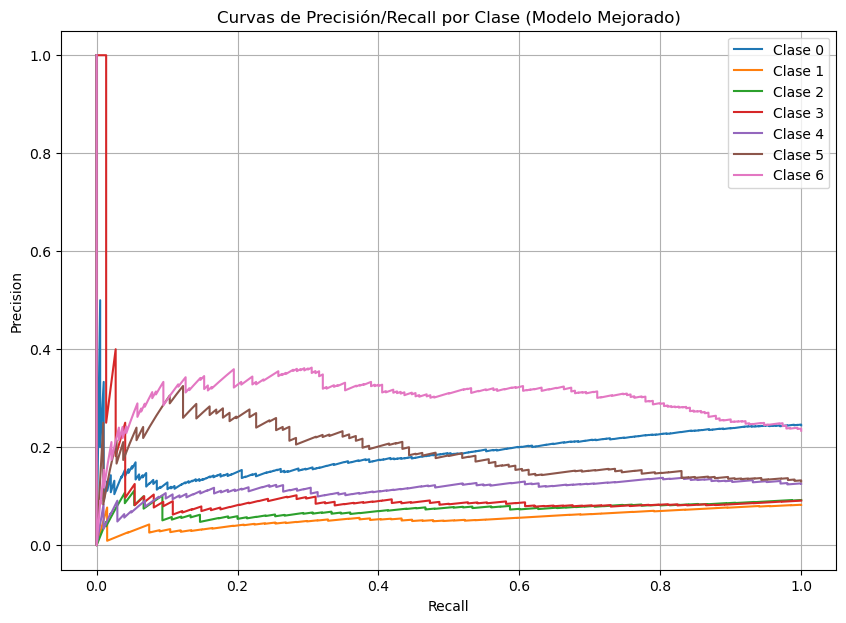

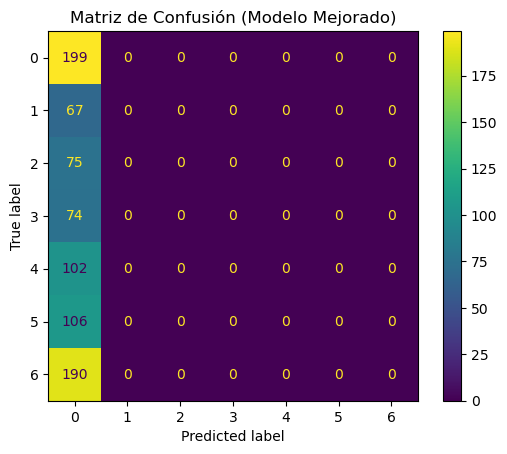

Informe de Clasificación (Modelo Mejorado):
              precision    recall  f1-score   support

     Clase 0       0.24      1.00      0.39       199
     Clase 1       0.00      0.00      0.00        67
     Clase 2       0.00      0.00      0.00        75
     Clase 3       0.00      0.00      0.00        74
     Clase 4       0.00      0.00      0.00       102
     Clase 5       0.00      0.00      0.00       106
     Clase 6       0.00      0.00      0.00       190

    accuracy                           0.24       813
   macro avg       0.03      0.14      0.06       813
weighted avg       0.06      0.24      0.10       813



C:\Users\victo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\victo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\victo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Obtener las predicciones del modelo mejorado
y_pred_probs_v2 = model_cnn_v2.predict(test_images)  # Probabilidades predichas
y_pred_classes_v2 = np.argmax(y_pred_probs_v2, axis=1)  # Clases predichas
y_true_classes_v2 = np.argmax(test_labels, axis=1)  # Clases verdaderas

# Curvas de Precisión y Recall (Modelo Mejorado)
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(test_labels[:, i], y_pred_probs_v2[:, i])
    plt.plot(recall, precision, label=f'Clase {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas de Precisión/Recall por Clase (Modelo Mejorado)')
plt.legend()
plt.grid()
plt.show()

# Matriz de Confusión
conf_matrix_v2 = confusion_matrix(y_true_classes_v2, y_pred_classes_v2)
disp_v2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_v2, display_labels=range(num_classes))
disp_v2.plot(cmap='viridis')
plt.title('Matriz de Confusión (Modelo Mejorado)')
plt.show()

# Informe de Clasificación (Modelo Mejorado)
print("Informe de Clasificación (Modelo Mejorado):")
report_v2 = classification_report(y_true_classes_v2, y_pred_classes_v2, target_names=[f'Clase {i}' for i in range(num_classes)])
print(report_v2)


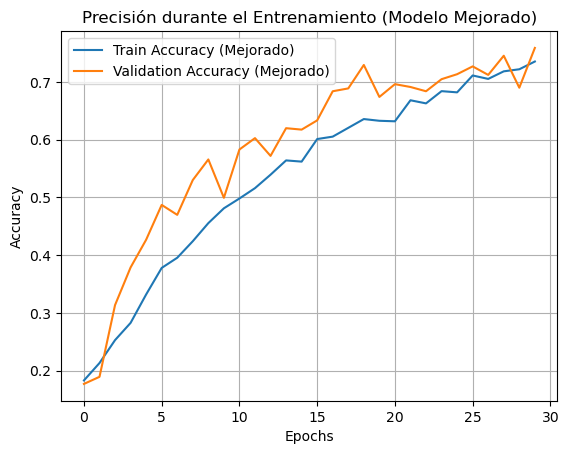

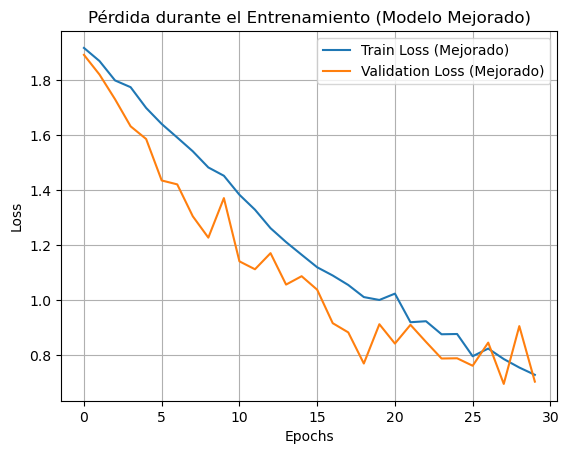

In [25]:
# Graficar Precisión (Modelo Mejorado)
plt.figure()
plt.plot(history_cnn_v2.history['accuracy'], label='Train Accuracy (Mejorado)')
plt.plot(history_cnn_v2.history['val_accuracy'], label='Validation Accuracy (Mejorado)')
plt.title('Precisión durante el Entrenamiento (Modelo Mejorado)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Graficar Pérdida (Modelo Mejorado)
plt.figure()
plt.plot(history_cnn_v2.history['loss'], label='Train Loss (Mejorado)')
plt.plot(history_cnn_v2.history['val_loss'], label='Validation Loss (Mejorado)')
plt.title('Pérdida durante el Entrenamiento (Modelo Mejorado)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [27]:
# Comparar Métricas Clave entre los Modelos
print("Comparación de Métricas entre Modelos:")
comparison = {
    "Modelo Original": {
        "Accuracy Final (Validación)": history_cnn.history['val_accuracy'][-1],
        "Loss Final (Validación)": history_cnn.history['val_loss'][-1]
    },
    "Modelo Mejorado": {
        "Accuracy Final (Validación)": history_cnn_v2.history['val_accuracy'][-1],
        "Loss Final (Validación)": history_cnn_v2.history['val_loss'][-1]
    }
}

# Imprimir la comparación
for modelo, metricas in comparison.items():
    print(f"{modelo}:")
    for metrica, valor in metricas.items():
        print(f"  {metrica}: {valor:.4f}")


Comparación de Métricas entre Modelos:
Modelo Original:
  Accuracy Final (Validación): 0.5793
  Loss Final (Validación): 1.1096
Modelo Mejorado:
  Accuracy Final (Validación): 0.7589
  Loss Final (Validación): 0.7049


Se utiliza GridSearchCV para encontrar la mejor combinación de hiperparámetros. TensorFlow/Keras no tiene soporte directo para GridSearchCV, así que se usa KerasClassifier de SciKit-learn.

In [33]:
!pip install scikeras


In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de nombres de las clases
nombres = ['Toyota Innova', 'Tata Safari', 'Swift', 'Rolls Royce', 'Mahindra Scorpio', 'Hyundai Creta', 'Audi']

# Predicciones del modelo para el conjunto de prueba
y_pred = model.predict(test_images)  # Obtiene las probabilidades para cada clase
y_pred_labels = np.argmax(y_pred, axis=1)  # Convierte a etiquetas de clase
y_true_labels = np.argmax(test_labels, axis=1)  # Etiquetas reales

# Configuración de la grilla para visualizar imágenes
h = 4  # Alto de la grilla
w = 4  # Ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6 * h, 1.6 * w))

# Mostrar ejemplos al azar del conjunto de prueba
for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(test_images))  # Índice aleatorio en el conjunto de prueba
        true_label = nombres[y_true_labels[ex]]  # Etiqueta real
        pred_label = nombres[y_pred_labels[ex]]  # Predicción del modelo
        axs[i, j].set_title(f"Pred: {pred_label}\nReal: {true_label}")  # Mostrar etiquetas
        axs[i, j].imshow(test_images[ex])  # Mostrar imagen
        axs[i, j].grid(False)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.tight_layout()
plt.show()


NotFittedError: Estimator needs to be fit before `predict` can be called